# Lab02 - Pedestrian Dead Reckoning

Course: Navigation Systems (WS2025, GST330UF)

Authors: Bernadette Kakuska & Hannah Öttl

Date: 15.12.2025

In [2]:
# libraries
import os
import numpy as np
import pandas as pd
import math as m
import time
import matplotlib.pyplot as plt


##### Data import

In [14]:
# file paths
base_path = os.getcwd()
path_data = os.path.join(base_path, "data_HeaderlineWithoutUnits")
path_results = os.path.join(base_path, "results")


In [ ]:
# Accelerometer Data
acc_data = pd.read_csv(os.path.join(path_data, "accelerometer.csv"), 
                       sep=",", skiprows=0, header=0)
acc_data

# units: time [ms], acc_x [ms⁻²], acc_y [ms⁻²], acc_z [ms⁻²]

,time,acc_x,acc_y,acc_z
0,0,-0.633865,-0.364068,-9.592368
1,10,-0.694169,-0.310348,-9.781810
2,20,-0.593313,-0.249745,-9.932944
3,30,-0.291644,-0.190339,-10.057292
4,40,-0.154875,-0.116268,-10.148272
...,...,...,...,...
18395,183950,-0.242712,-0.318130,-9.744251
18396,183960,-0.076016,-0.602142,-9.628581
18397,183970,-0.279673,-0.477045,-9.786599
18398,183980,-0.373196,-0.316035,-9.733627


In [ ]:
# Barometer Data
baro_data = pd.read_csv(os.path.join(path_data, "barometer.csv"), 
                       sep=",", skiprows=0, header=0)
baro_data

# units: time [ms], pressure [mBar]


,time,pressure
0,0,984.970474
1,1000,984.966888
2,2000,984.963379
3,3000,984.955673
4,4000,984.954987
...,...,...
179,179000,984.942398
180,180000,984.933929
181,181000,984.933929
182,182000,984.933929


In [17]:
# Ground-Truth Data
grtr_data = pd.read_csv(os.path.join(path_data, "groundTruth.csv"), 
                       sep=",", skiprows=0, header=0)
grtr_data

# units: time[ms], x[m], y[m], latitude[°], longitude[°]

,time,x,y,latitude,longitude
0,0.000,0.000000,0.000000,47.06422,15.45291
1,8.333,0.000110,-0.000026,47.06422,15.45291
2,16.667,0.000202,-0.000089,47.06422,15.45291
3,25.000,0.000288,-0.000185,47.06422,15.45291
4,33.333,0.000376,-0.000310,47.06422,15.45291
...,...,...,...,...,...
5889,182125.000,0.022305,0.008859,47.06422,15.45291
5890,182133.333,0.022111,0.008802,47.06422,15.45291
5891,182141.667,0.021872,0.008697,47.06422,15.45291
5892,182150.000,0.021594,0.008591,47.06422,15.45291


In [22]:
# Gyroscope Data
gyro_data = pd.read_csv(os.path.join(path_data, "gyroscope.csv"), 
                       sep=",", skiprows=0, header=0)
gyro_data

# units: time[ms], gyro_x[rad/s], gyro_y[rad/s], gyro_z[rad/s]

,time,gyro_x,gyro_y,gyro_z
0,0,-0.096788,0.118042,-0.047132
1,10,-0.090870,0.116402,-0.069423
2,20,-0.061148,0.089168,-0.058506
3,30,-0.011676,0.037025,-0.039837
4,40,0.040520,-0.019704,-0.040591
...,...,...,...,...
18395,183950,0.064119,-0.098101,-0.003915
18396,183960,0.050061,-0.076272,-0.018597
18397,183970,0.017183,-0.036650,-0.029343
18398,183980,-0.011957,0.015003,-0.025506


In [ ]:
# Magnetometer Data
mag_data = pd.read_csv(os.path.join(path_data, "magnetometer.csv"), 
                       sep=",", skiprows=0, header=0)
mag_data

# units: time[ms], mag_x[μT], mag_y[μT], mag_z[μT]

,time,mag_x,mag_y,mag_z
0,0,-1.421341,19.678070,-41.277657
1,10,-1.378044,19.599060,-41.194695
2,20,-1.503525,19.547516,-41.245903
3,30,-1.499771,19.508377,-41.265495
4,40,-1.761223,19.461792,-41.377472
...,...,...,...,...
18395,183950,-3.798759,18.204559,-41.585686
18396,183960,-3.602898,18.325775,-41.829407
18397,183970,-3.716156,18.317139,-41.968430
18398,183980,-3.879196,18.473526,-42.033295


In [21]:
# Reference Orientation Data
ref_data = pd.read_csv(os.path.join(path_data, "referenceOrientation.csv"), 
                       sep=",", skiprows=0, header=0)
ref_data

# units: time[ms], roll[rad], pitch[rad], yaw[rad]

,time,roll,pitch,yaw
0,0,0.038274,-0.019553,0.092508
1,10,0.037030,-0.018595,0.093148
2,20,0.035943,-0.017857,0.093819
3,30,0.035290,-0.017525,0.094309
4,40,0.035261,-0.017725,0.094685
...,...,...,...,...
18395,183950,0.021910,-0.043875,0.132102
18396,183960,0.022727,-0.044450,0.132187
18397,183970,0.023383,-0.044742,0.132418
18398,183980,0.023526,-0.044730,0.132690


##### Time Normalisation

In [24]:
#def normalize_time(df):
 #   df["t"] = (df["time_ms"] - df["time_ms"].iloc[0]) / 1000.0
  #  return df

#for df in [acc_data, baro_data, grtr_data, gyro_data, mag_data, ref_data]:
 #   normalize_time(df)


##### First plotting

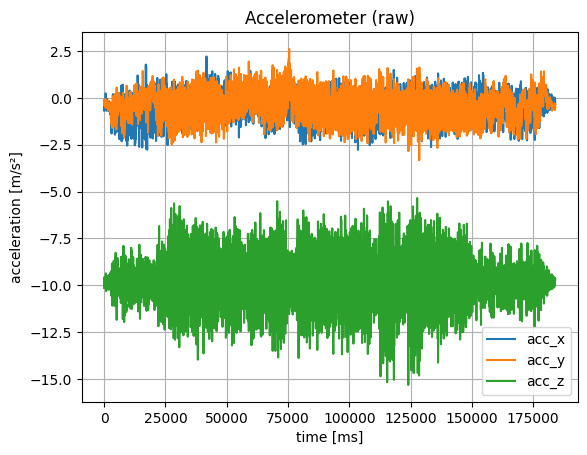

In [31]:
# Accelerometer (raw)
acc_data.set_index("time")[["acc_x", "acc_y", "acc_z"]].plot()
plt.title("Accelerometer (raw)")
plt.xlabel("time [ms]")
plt.ylabel("acceleration [m/s²]")
plt.grid()
plt.show()


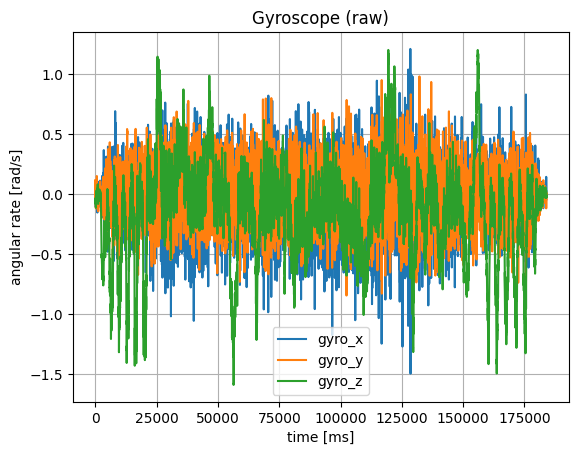

In [32]:
# Gyroscope
gyro_data.set_index("time")[["gyro_x", "gyro_y", "gyro_z"]].plot()
plt.title("Gyroscope (raw)")
plt.xlabel("time [ms]")
plt.ylabel("angular rate [rad/s]")
plt.grid()
plt.show()

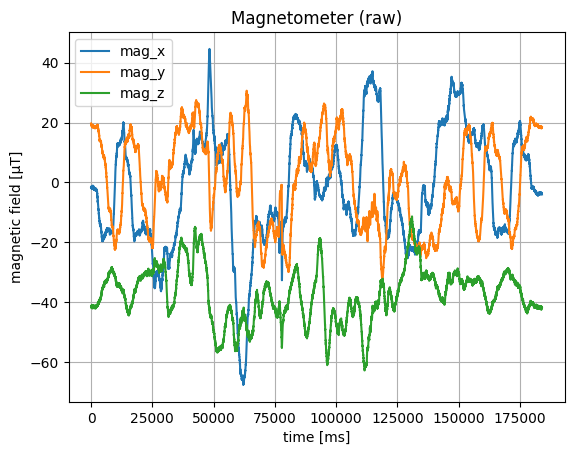

In [33]:
# Magnetometer
mag_data.set_index("time")[["mag_x", "mag_y", "mag_z"]].plot()
plt.title("Magnetometer (raw)")
plt.xlabel("time [ms]")
plt.ylabel("magnetic field [μT]")
plt.grid()
plt.show()

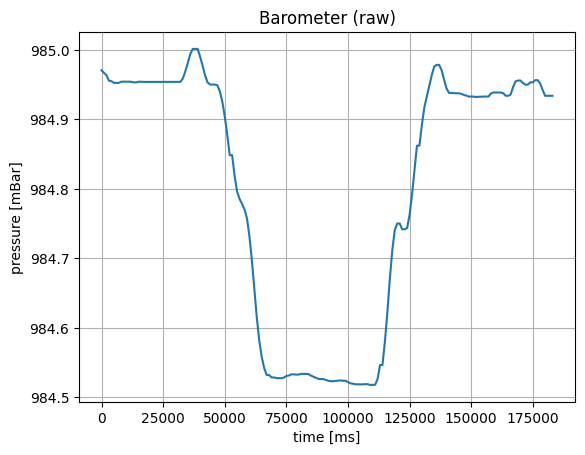

In [34]:
# Barometer
baro_data.set_index("time")["pressure"].plot()
plt.title("Barometer (raw)")
plt.xlabel("time [ms]")
plt.ylabel("pressure [mBar]")
plt.grid()
plt.show()

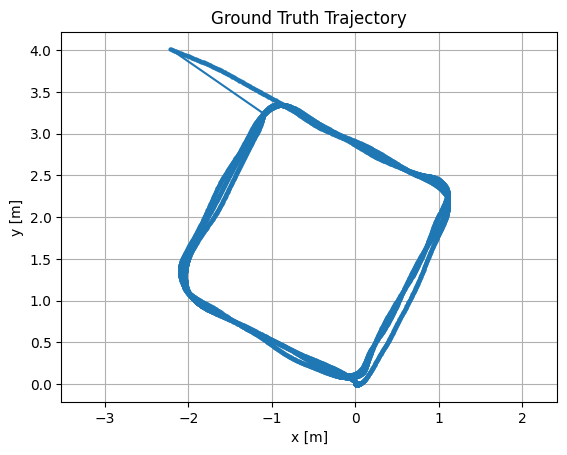

In [38]:
# Ground Truth
plt.figure()
plt.plot(grtr_data.x, grtr_data.y, marker='o', markersize=2)
plt.title("Ground Truth Trajectory")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.axis("equal")
plt.grid()
plt.show()

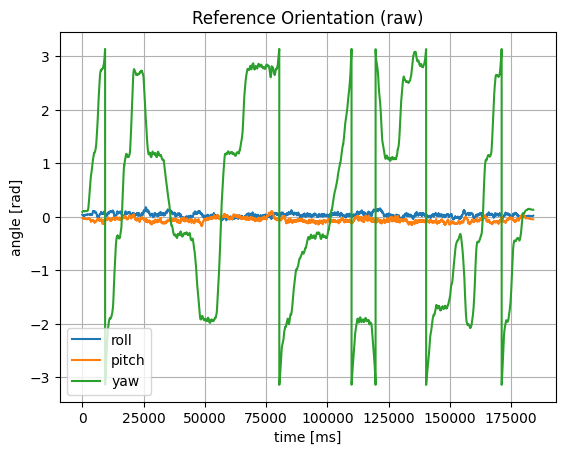

In [39]:
# Reference Orientation
ref_data.set_index("time")[["roll", "pitch", "yaw"]].plot()
plt.title("Reference Orientation (raw)")
plt.xlabel("time [ms]")
plt.ylabel("angle [rad]")
plt.grid()
plt.show()

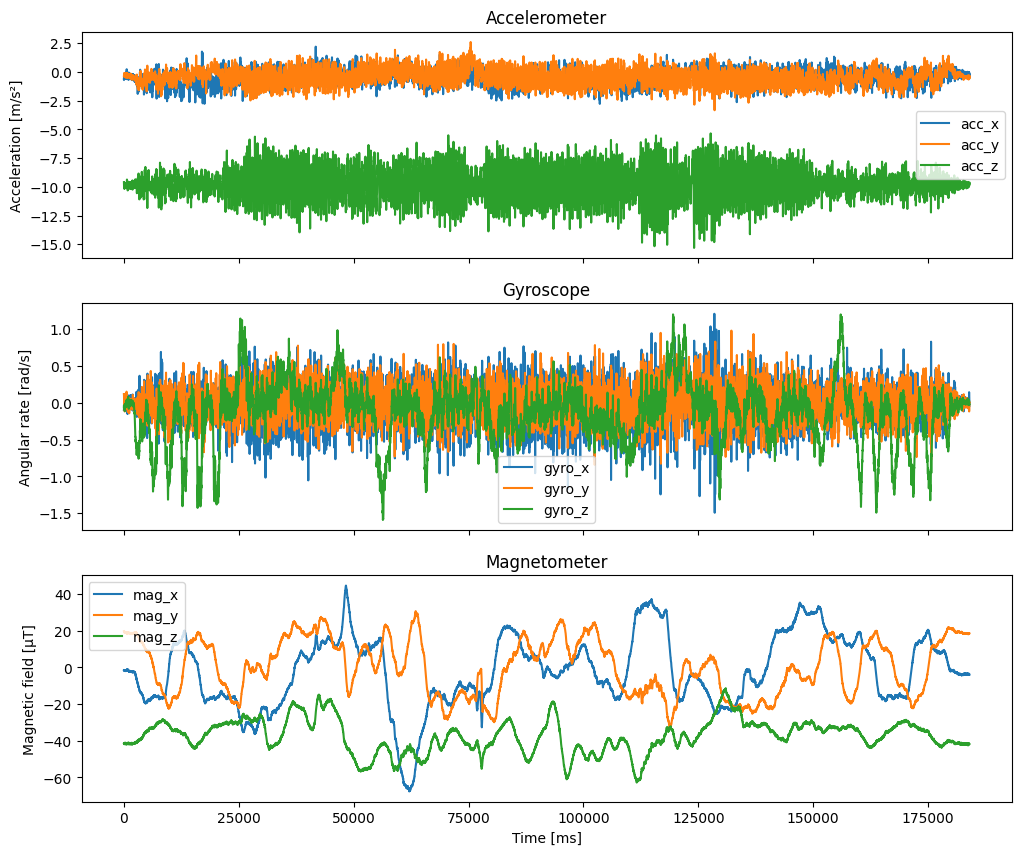

In [47]:
# All in subplots - Motion sensors (acceleration & rotation)
# Accelerometer -> linear motion, steps
# Gyroscope -> rotational motion
# Magnetometer -> heading / orientation

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Accelerometer (m/s²)
acc_data.set_index("time")[["acc_x","acc_y","acc_z"]].plot(ax=axs[0])
axs[0].set_title("Accelerometer")
axs[0].set_ylabel("Acceleration [m/s²]")

# Gyroscope (rad/s)
gyro_data.set_index("time")[["gyro_x","gyro_y","gyro_z"]].plot(ax=axs[1])
axs[1].set_title("Gyroscope")
axs[1].set_ylabel("Angular rate [rad/s]")

# Magnetometer (µT)
mag_data.set_index("time")[["mag_x","mag_y","mag_z"]].plot(ax=axs[2])
axs[2].set_title("Magnetometer")
axs[2].set_ylabel("Magnetic field [µT]")

# Common x-axis label (time in ms)
plt.xlabel("Time [ms]")
plt.show()




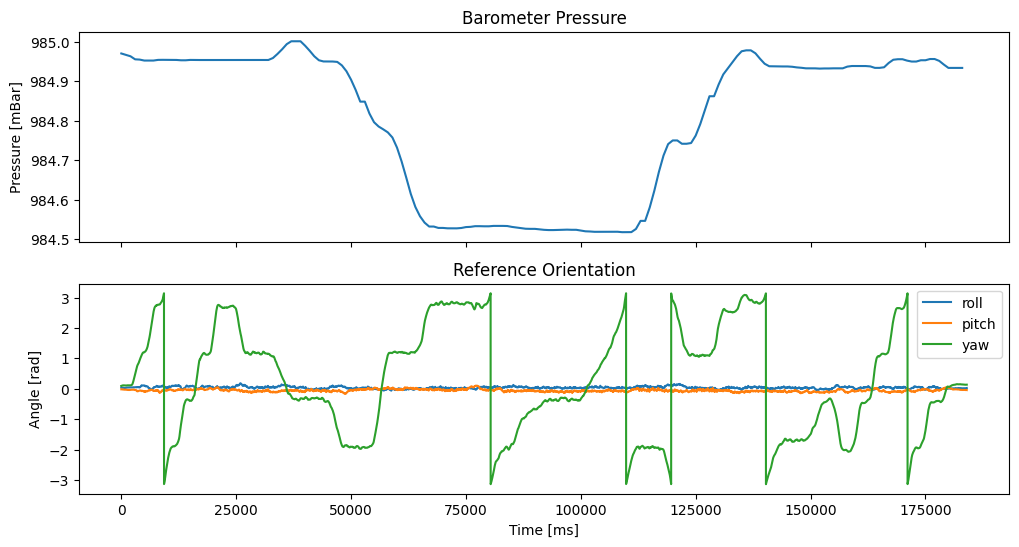

In [48]:
# All in subplots - Altitude & orientation
# Barometer -> altitude changes
# Reference Orientation (roll, pitch, yaw) → fused orientation

fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Barometer (pressure in mBar)
baro_data.set_index("time")["pressure"].plot(ax=axs[0])
axs[0].set_title("Barometer Pressure")
axs[0].set_ylabel("Pressure [mBar]")

# Reference Orientation (roll, pitch, yaw in rad)
ref_data.set_index("time")[["roll","pitch","yaw"]].plot(ax=axs[1])
axs[1].set_title("Reference Orientation")
axs[1].set_ylabel("Angle [rad]")

# Common x-axis label (time in ms)
plt.xlabel("Time [ms]")
plt.show()


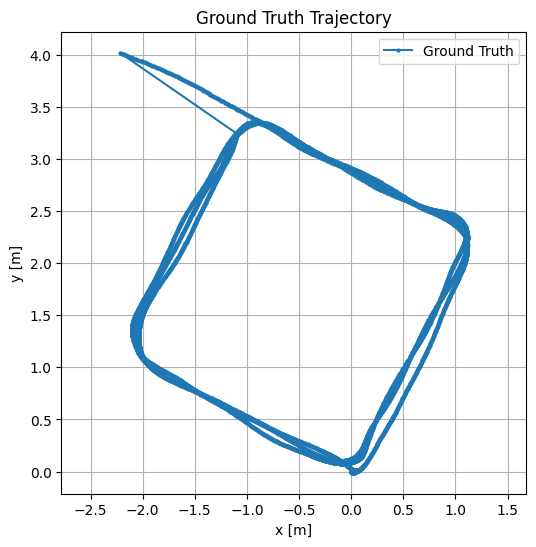

In [49]:
# Plot Trajectory / position
# Ground Truth -> XY trajectory for comparison with dead reckoning

plt.figure(figsize=(6, 6))
plt.plot(grtr_data.x, grtr_data.y, marker='o', markersize=2, label="Ground Truth")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Ground Truth Trajectory")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

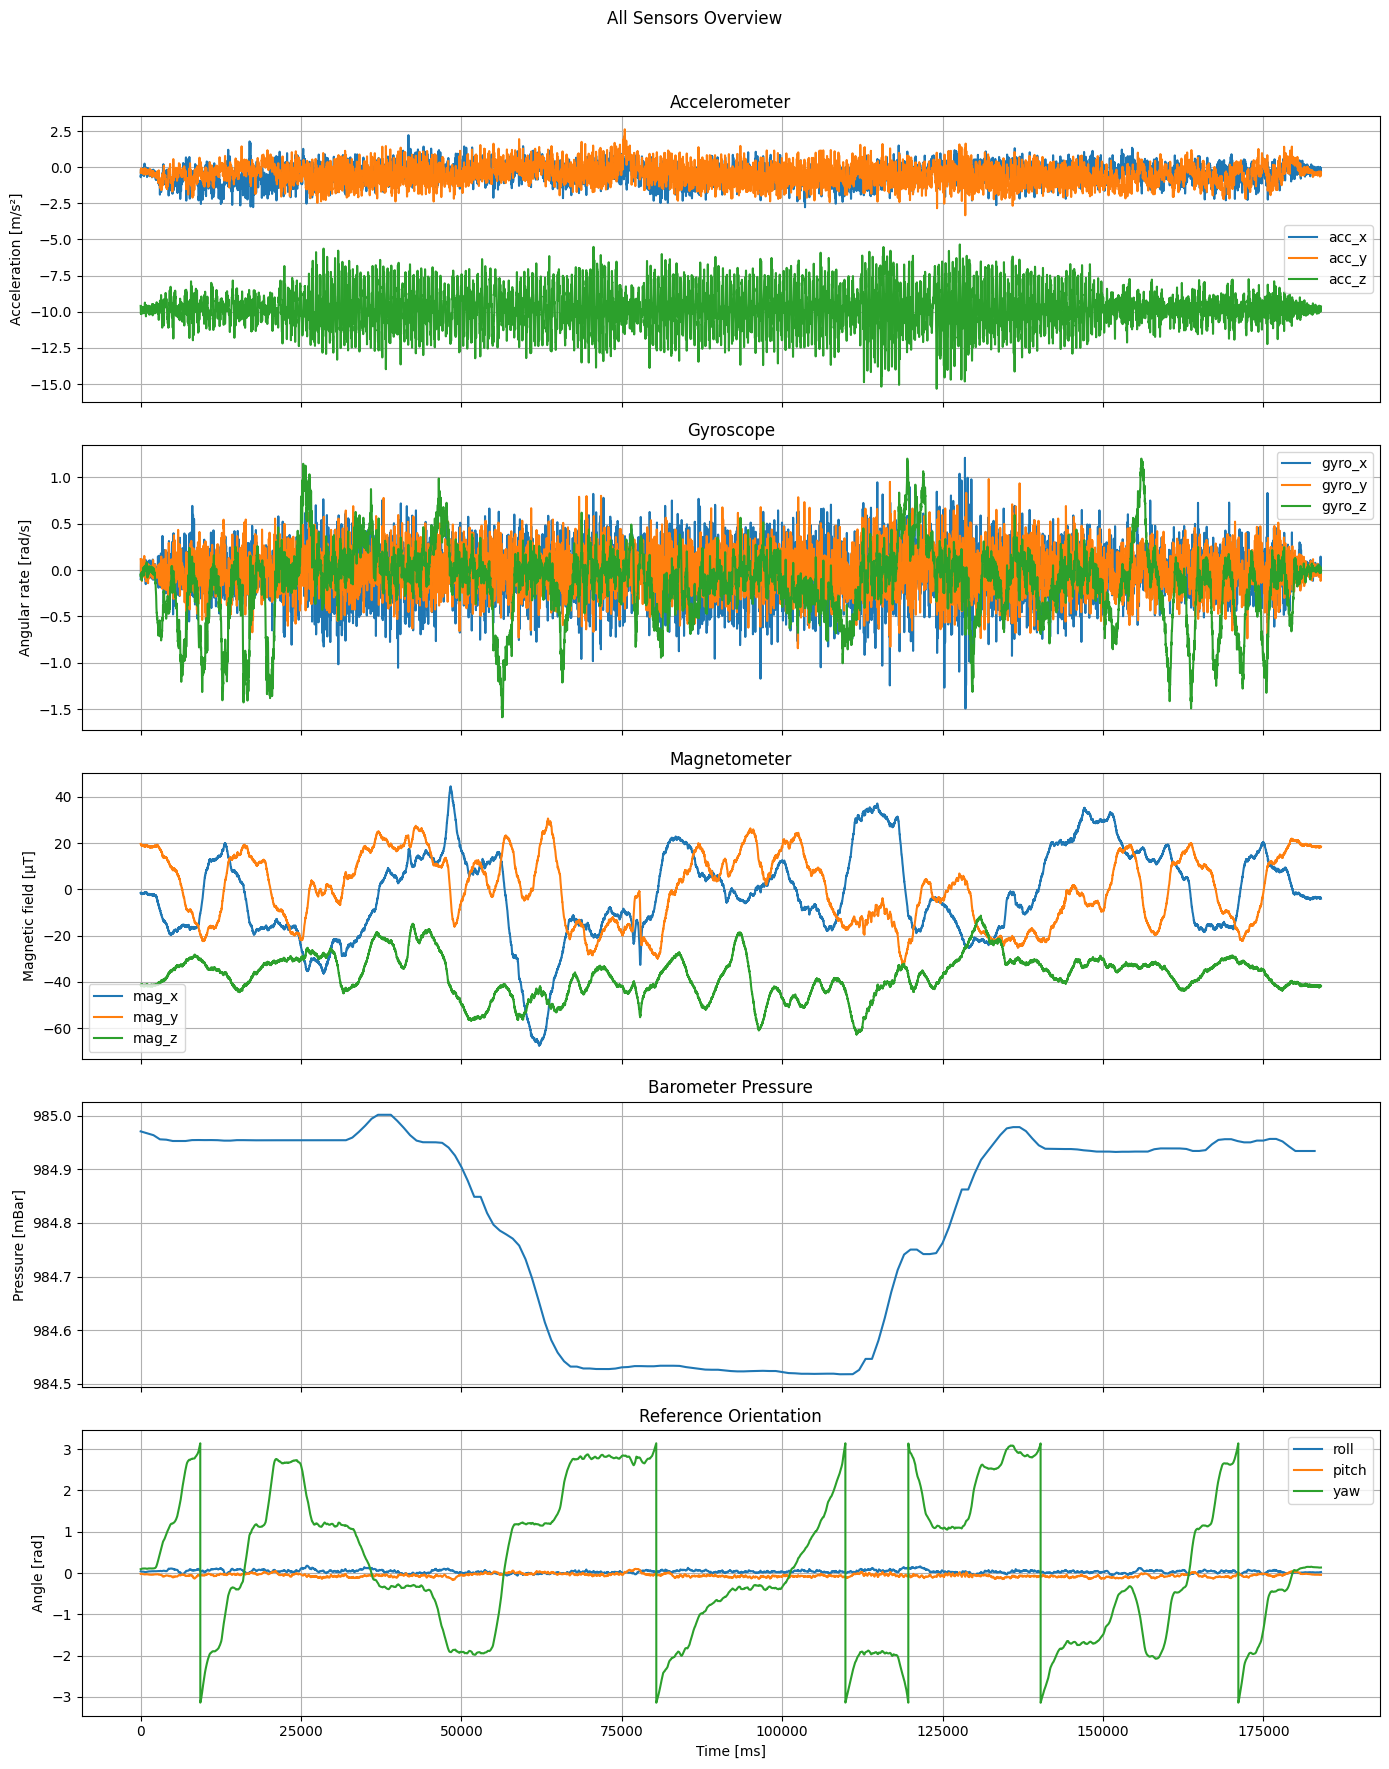

In [52]:
# --- 5 sensors in one figure ---
fig, axs = plt.subplots(5, 1, figsize=(14, 18), sharex=True)

# 1. Accelerometer
acc_data.set_index("time")[["acc_x","acc_y","acc_z"]].plot(ax=axs[0])
axs[0].set_title("Accelerometer")
axs[0].set_ylabel("Acceleration [m/s²]")
axs[0].grid(True)

# 2. Gyroscope
gyro_data.set_index("time")[["gyro_x","gyro_y","gyro_z"]].plot(ax=axs[1])
axs[1].set_title("Gyroscope")
axs[1].set_ylabel("Angular rate [rad/s]")
axs[1].grid(True)

# 3. Magnetometer
mag_data.set_index("time")[["mag_x","mag_y","mag_z"]].plot(ax=axs[2])
axs[2].set_title("Magnetometer")
axs[2].set_ylabel("Magnetic field [µT]")
axs[2].grid(True)

# 4. Barometer
baro_data.set_index("time")["pressure"].plot(ax=axs[3])
axs[3].set_title("Barometer Pressure")
axs[3].set_ylabel("Pressure [mBar]")
axs[3].grid(True)

# 5. Reference Orientation
ref_data.set_index("time")[["roll","pitch","yaw"]].plot(ax=axs[4])
axs[4].set_title("Reference Orientation")
axs[4].set_ylabel("Angle [rad]")
axs[4].set_xlabel("Time [ms]")  # only bottom subplot
axs[4].grid(True)

plt.suptitle("All Sensors Overview")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### Data Filtering